## NYC Parking Tickets - Assignment

### Business Problem Overview

New York City is a thriving metropolis. Just like most other metros its size, one of the biggest problems its citizens face is parking. The classic combination of a huge number of cars and cramped geography leads to a huge number of parking tickets.

In an attempt to scientifically analyse this phenomenon, the NYC Police Department has collected data for parking tickets

### Goal
To conduct an exploratory data analysis that will help in understanding the data. 


In [510]:
#Instantiating spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("NYC Parking").getOrCreate()

In [511]:
# Reading the data
nyc_parking = spark.read.format("csv").option("header", "true").load("/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")

In [512]:
#Checking the schema
nyc_parking.printSchema()

root
 |-- Summons Number: string (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: string (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: string (nullable = true)
 |-- Issuer Precinct: string (nullable = true)
 |-- Violation Time: string (nullable = true)



In [513]:
#Checking the records
nyc_parking.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|                NY|2017-06-14|            47|             REFG|

In [514]:
#Checking the number of records
nyc_parking.count()

10803028

In [515]:
#Checking the columns
nyc_parking.columns

['Summons Number',
 'Plate ID',
 'Registration State',
 'Issue Date',
 'Violation Code',
 'Vehicle Body Type',
 'Vehicle Make',
 'Violation Precinct',
 'Issuer Precinct',
 'Violation Time']

In [516]:
violation_count=nyc_parking.groupBy("Violation Code").count().sort("count", ascending=False)
violation_count.show(5)

+--------------+-------+
|Violation Code|  count|
+--------------+-------+
|            21|1528588|
|            36|1400614|
|            38|1062304|
|            14| 893498|
|            20| 618593|
+--------------+-------+
only showing top 5 rows



<Figure size 3600x3600 with 0 Axes>

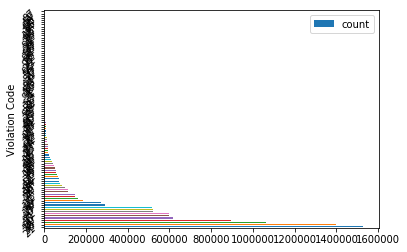

In [611]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nyc_df=violation_count.toPandas()
nyc_df.plot(x='Violation Code',y='count',kind='barh',rot=45)

In [518]:
state_count=nyc_parking.groupBy("Registration State").count().sort("count", ascending=False)
state_count.show(5)

+------------------+-------+
|Registration State|  count|
+------------------+-------+
|                NY|8481061|
|                NJ| 925965|
|                PA| 285419|
|                FL| 144556|
|                CT| 141088|
+------------------+-------+
only showing top 5 rows



<Figure size 3600x3600 with 0 Axes>

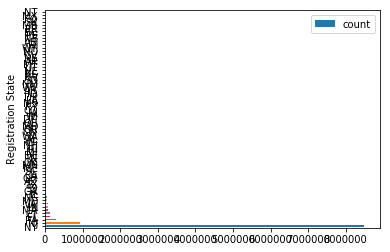

In [612]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nyc_df=state_count.toPandas()
nyc_df.plot(x='Registration State',y='count',kind='barh')

In [520]:
#Creating table view for the data
nyc_parking.createOrReplaceTempView("nyc_parking_table")

### Examine the data

In [521]:
#Checking the total number of tickets for the year
nyc_parking.select('Summons Number').distinct().count()

10803028

#### The total number of tickets for the year : 10803028 

In [522]:
#Checking the number of unique states from where the cars that got parking tickets came.
nyc_parking.select('Registration State').distinct().count()

67

In [523]:
#Checking the count of invalid  registration states
nyc_parking.filter(nyc_parking["Registration State"]=='99').count()

36625

In [524]:
#Checking the state that has maximum entries
nyc_parking.groupBy("Registration State").count().sort("count", ascending=False).take(1)

[Row(Registration State='NY', count=8481061)]

In [525]:
#Replacing the invalid registration state 99 with the state with max number of entries
from pyspark.sql.functions import when,lit
nyc_parking=nyc_parking.withColumn("Registration State", when(nyc_parking["Registration State"]=="99",lit("NY")).otherwise(nyc_parking["Registration State"]))

In [526]:
#Checking the count of invalid  registration states
nyc_parking.filter(nyc_parking["Registration State"]=='99').count()

0

In [527]:
#Checking the state that has maximum entries
nyc_parking.groupBy("Registration State").count().sort("count", ascending=False).take(1)

[Row(Registration State='NY', count=8517686)]

In [528]:
#Checking the number of unique states from where the cars that got parking tickets came.
nyc_parking.select('Registration State').distinct().count()

66

#### The number of unique states from where the cars that got parking tickets came is 66

### Aggregation Tasks

In [529]:
#Checking the frequency of each violation code
nyc_parking.groupBy("Violation Code").count().sort("count", ascending=False).take(5)

[Row(Violation Code='21', count=1528588),
 Row(Violation Code='36', count=1400614),
 Row(Violation Code='38', count=1062304),
 Row(Violation Code='14', count=893498),
 Row(Violation Code='20', count=618593)]

#### The frequency of the top five violation codes are:
#### Violation Code='21': 1528588
#### Violation Code='36': 1400614
#### Violation Code='38': 1062304
#### Violation Code='14': 893498
#### Violation Code='20': 618593

In [530]:
#Checking the frequency of each 'vehicle body type' getting a parking ticket
nyc_parking.groupBy("Vehicle Body Type").count().sort("count", ascending=False).take(5)

[Row(Vehicle Body Type='SUBN', count=3719802),
 Row(Vehicle Body Type='4DSD', count=3082020),
 Row(Vehicle Body Type='VAN', count=1411970),
 Row(Vehicle Body Type='DELV', count=687330),
 Row(Vehicle Body Type='SDN', count=438191)]

#### The frequency of the top five vehicle body types :
#### Vehicle Body Type='SUBN': 3719802
#### Vehicle Body Type='4DSD: 3082020
#### Vehicle Body Type='VAN': 1411970
#### Vehicle Body Type='DELV': 687330
#### Vehicle Body Type='SDN': 438191

In [531]:
#Checking the frequency of each 'vehicle make' getting a parking ticket
nyc_parking.groupBy("Vehicle Make").count().sort("count", ascending=False).take(5)

[Row(Vehicle Make='FORD', count=1280958),
 Row(Vehicle Make='TOYOT', count=1211451),
 Row(Vehicle Make='HONDA', count=1079238),
 Row(Vehicle Make='NISSA', count=918590),
 Row(Vehicle Make='CHEVR', count=714655)]

#### The frequency of the top five vehicle make :
#### Vehicle Make='FORD': 1280958
#### Vehicle Make='TOYOT': 1211451
#### Vehicle Make='HONDA': 1079238
#### Vehicle Make='NISSA': 918590
#### Vehicle Make='CHEVR': 714655

In [532]:
#Checking the frequency of each 'Violation Precinct' getting a parking ticket
nyc_parking.groupBy("Violation Precinct").count().sort("count", ascending=False).collect()

[Row(Violation Precinct='0', count=2072400),
 Row(Violation Precinct='19', count=535671),
 Row(Violation Precinct='14', count=352450),
 Row(Violation Precinct='1', count=331810),
 Row(Violation Precinct='18', count=306920),
 Row(Violation Precinct='114', count=296514),
 Row(Violation Precinct='13', count=246595),
 Row(Violation Precinct='109', count=218141),
 Row(Violation Precinct='17', count=193024),
 Row(Violation Precinct='70', count=192831),
 Row(Violation Precinct='115', count=174332),
 Row(Violation Precinct='84', count=171079),
 Row(Violation Precinct='61', count=166997),
 Row(Violation Precinct='20', count=163992),
 Row(Violation Precinct='108', count=159276),
 Row(Violation Precinct='52', count=152046),
 Row(Violation Precinct='66', count=150370),
 Row(Violation Precinct='112', count=148314),
 Row(Violation Precinct='103', count=144607),
 Row(Violation Precinct='90', count=143443),
 Row(Violation Precinct='6', count=136189),
 Row(Violation Precinct='62', count=132853),
 Row(V

In [533]:
#Checking the frequency of the top five valid violation codes
#As '0 is invalid Violation Precinct displaying the records for top six entries after sorting.
nyc_parking.groupBy("Violation Precinct").count().sort("count", ascending=False).take(6)

[Row(Violation Precinct='0', count=2072400),
 Row(Violation Precinct='19', count=535671),
 Row(Violation Precinct='14', count=352450),
 Row(Violation Precinct='1', count=331810),
 Row(Violation Precinct='18', count=306920),
 Row(Violation Precinct='114', count=296514)]

#### The frequency of the top five Violation Precincts :
#### Violation Precinct='19':535671
#### Violation Precinct='14':352450
#### Violation Precinct='1':331810
#### Violation Precinct='18':306920
#### Violation Precinct='114':296514

In [534]:
#Checking the states with highest frequency in the top five Violation Precincts
nyc_parking.filter(nyc_parking['Violation Precinct']=='19').groupBy("Registration State").count().sort("count", ascending=False).take(5)

[Row(Registration State='NY', count=416114),
 Row(Registration State='NJ', count=64359),
 Row(Registration State='CT', count=9209),
 Row(Registration State='PA', count=9053),
 Row(Registration State='IN', count=8653)]

In [535]:
#Checking if the states with highest frequency in the top five Violation Precincts
nyc_parking.filter(nyc_parking['Violation Precinct']=='14').groupBy("Registration State").count().sort("count", ascending=False).take(5)

[Row(Registration State='NY', count=232881),
 Row(Registration State='NJ', count=73233),
 Row(Registration State='IN', count=10807),
 Row(Registration State='PA', count=6545),
 Row(Registration State='MN', count=3825)]

In [536]:
#Checking if the states with highest frequency in the top five Violation Precincts
nyc_parking.filter(nyc_parking['Violation Precinct']=='1').groupBy("Registration State").count().sort("count", ascending=False).take(5)

[Row(Registration State='NY', count=236237),
 Row(Registration State='NJ', count=55640),
 Row(Registration State='PA', count=6219),
 Row(Registration State='IN', count=5066),
 Row(Registration State='CT', count=4320)]

In [537]:
#Checking if the states with highest frequency in the top five Violation Precincts
nyc_parking.filter(nyc_parking['Violation Precinct']=='18').groupBy("Registration State").count().sort("count", ascending=False).take(5)

[Row(Registration State='NY', count=200594),
 Row(Registration State='NJ', count=61184),
 Row(Registration State='IN', count=11413),
 Row(Registration State='PA', count=6339),
 Row(Registration State='CT', count=4202)]

In [538]:
#Checking if the states with highest frequency in the top five Violation Precincts
nyc_parking.filter(nyc_parking['Violation Precinct']=='114').groupBy("Registration State").count().sort("count", ascending=False).take(5)

[Row(Registration State='NY', count=249486),
 Row(Registration State='NJ', count=15642),
 Row(Registration State='PA', count=5693),
 Row(Registration State='CT', count=3937),
 Row(Registration State='FL', count=3806)]

#### NY and NJ has the highest number of parking violations  in all of the top five Violation Precincts

In [539]:
#Checking the frequency of each 'Issuing Precinct' getting a parking ticket
nyc_parking.groupBy("Issuer Precinct").count().sort("count", ascending=False).take(6)

[Row(Issuer Precinct='0', count=2388479),
 Row(Issuer Precinct='19', count=521513),
 Row(Issuer Precinct='14', count=344977),
 Row(Issuer Precinct='1', count=321170),
 Row(Issuer Precinct='18', count=296553),
 Row(Issuer Precinct='114', count=289950)]

#### The frequency of the top five Issuer Precincts :
#### Issuer Precinct='19':521513
#### Issuer Precinct='14':344977
#### Issuer Precinct='1':321170
#### Issuer Precinct='18':296553
#### Issuer Precinct='114':289950

In [540]:
#Checking the frequency of the top five valid violation codes
#As '0 is invalid Issuer Precinct displaying the records for top six entries after sorting.
nyc_parking.groupBy('Issuer Precinct','Registration State').count().sort("count", ascending=False).take(6)

[Row(Issuer Precinct='0', Registration State='NY', count=1974434),
 Row(Issuer Precinct='19', Registration State='NY', count=405074),
 Row(Issuer Precinct='114', Registration State='NY', count=244046),
 Row(Issuer Precinct='1', Registration State='NY', count=228990),
 Row(Issuer Precinct='14', Registration State='NY', count=227876),
 Row(Issuer Precinct='18', Registration State='NY', count=192930)]

#### NY has the highest count in all of the top five Issuer Precincts

In [541]:
#Checking the frequency of top five violation codes in top three Issuer Precincts
nyc_parking.filter(nyc_parking['Issuer Precinct']=='19').groupBy("Violation Code").count().sort("count", ascending=False).take(5)

[Row(Violation Code='46', count=86390),
 Row(Violation Code='37', count=72437),
 Row(Violation Code='38', count=72344),
 Row(Violation Code='14', count=57563),
 Row(Violation Code='21', count=54700)]

In [542]:
#Checking the frequency of top five violation codes in top three Issuer Precincts
nyc_parking.filter(nyc_parking['Issuer Precinct']=='114').groupBy("Violation Code").count().sort("count", ascending=False).take(5)

[Row(Violation Code='21', count=70611),
 Row(Violation Code='38', count=54624),
 Row(Violation Code='37', count=36961),
 Row(Violation Code='20', count=24022),
 Row(Violation Code='71', count=20168)]

In [543]:
#Checking the frequency of top five violation codes in top three Issuer Precincts
nyc_parking.filter(nyc_parking['Issuer Precinct']=='1').groupBy("Violation Code").count().sort("count", ascending=False).take(5)

[Row(Violation Code='14', count=73522),
 Row(Violation Code='16', count=38937),
 Row(Violation Code='20', count=27841),
 Row(Violation Code='46', count=22534),
 Row(Violation Code='38', count=16989)]

#### Yes, the top three Issuer Precinct zones have an exceptionally high frequency of certain violation codes.
#### Violation Code='14' is common among the three top Issuer Precincts

In [544]:
#Checking for the null values
from pyspark.sql.functions import count,col

nyc_parking.select([count(when(col(c).isNull(), c)).alias(c) for c in nyc_parking.columns]).show()

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|             0|       0|                 0|         0|             0|                0|           0|                 0|              0|             0|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



In [545]:
#Checking for null values in each column
nyc_parking.where(col("Summons Number").isNull()).count()

0

In [546]:
#Checking for null values in each column
nyc_parking.where(col("Plate ID").isNull()).count()

0

In [547]:
#Checking for null values in each column
nyc_parking.where(col("Registration State").isNull()).count()

0

In [548]:
#Checking for null values in each column
nyc_parking.where(col("Issue Date").isNull()).count()

0

In [549]:
#Checking for null values in each column
nyc_parking.where(col("Violation Code").isNull()).count()

0

In [550]:
#Checking for null values in each column
nyc_parking.where(col("Vehicle Body Type").isNull()).count()

0

In [551]:
#Checking for null values in each column
nyc_parking.where(col("Vehicle Make").isNull()).count()

0

In [552]:
#Checking for null values in each column
nyc_parking.where(col("Violation Precinct").isNull()).count()

0

In [553]:
#Checking for null values in each column
nyc_parking.where(col("Issuer Precinct").isNull()).count()

0

In [554]:
#Checking for null values in each column
nyc_parking.where(col("Violation Precinct").isNull()).count()

0

In [555]:
#Checking for null values in each column
nyc_parking.where(col("Violation Time").isNull()).count()

0

In [556]:
#Checking for nan values in each column
nyc_parking.where(col("Summons Number") =='nan').count()

0

In [557]:
#Checking for nan values in each column
nyc_parking.where(col("Plate ID") =='nan').count()

728

In [558]:
#Checking for nan values in each column
nyc_parking.where(col("Registration State") =='nan').count()

0

In [559]:
#Checking for nan values in each column
nyc_parking.where(col("Issue Date") =='nan').count()

0

In [560]:
#Checking for nan values in each column
nyc_parking.where(col("Violation Code") =='nan').count()

0

In [561]:
#Checking for nan values in each column
nyc_parking.where(col("Vehicle Body Type") =='nan').count()

42711

In [562]:
#Checking for nan values in each column
nyc_parking.where(col("Vehicle Make") =='nan').count()

73050

In [563]:
#Checking for nan values in each column
nyc_parking.where(col("Violation Precinct") =='nan').count()

0

In [564]:
#Checking for nan values in each column
nyc_parking.where(col("Issuer Precinct") =='nan').count()

0

In [565]:
nyc_parking.where(col("Violation Precinct") =='nan').count()

0

In [566]:
#Checking for nan values in each column
nyc_parking.where(col("Violation Time") =='nan').count()

63

#### There are no null values.The following columns have nan values:
#### "Plate ID":728
#### "Vehicle Body Type":42711
#### "Vehicle Make":73050
#### "Violation Time":63

In [567]:
nyc_parking.count()

10803028

In [568]:
#Removing the nan values from the data set
nyc_parking=nyc_parking.filter(nyc_parking["Plate ID"] !='nan')
nyc_parking=nyc_parking.filter(nyc_parking["Vehicle Body Type"] !='nan')
nyc_parking=nyc_parking.filter(nyc_parking["Vehicle Make"] !='nan')
nyc_parking=nyc_parking.filter(nyc_parking["Violation Time"] !='nan')

In [569]:
#Checking if the nan values are removed
nyc_parking.where(col("Plate ID") =='nan').count()

0

In [570]:
#Checking if the nan values are removed
nyc_parking.where(col("Vehicle Body Type") =='nan').count()

0

In [571]:
#Checking if the nan values are removed
nyc_parking.where(col("Vehicle Make") =='nan').count()

0

In [572]:
#Checking if the nan values are removed
nyc_parking.where(col("Violation Time") =='nan').count()

0

In [573]:
nyc_parking.count()

10697443

In [574]:
#Creating a new column Violation_Time_24Hrs to store violation time in 24 hrs format
nyc_parking =nyc_parking.withColumn("Violation_Time_24Hrs", nyc_parking['Violation Time'].substr(0,4).cast("Int"))

In [575]:
#Checking for erroneous records with invalid Violation Time in data
nyc_parking.select("Violation Time","Violation_Time_24Hrs").filter(nyc_parking["Violation_Time_24Hrs"]>=1259).count()

16045

In [576]:
#Checking for erroneous records with invalid Violation Time in data
nyc_parking.select("Violation Time","Violation_Time_24Hrs").sort("Violation_Time_24Hrs", ascending=False).take(5)

[Row(Violation Time='8755P', Violation_Time_24Hrs=8755),
 Row(Violation Time='8735P', Violation_Time_24Hrs=8735),
 Row(Violation Time='8732P', Violation_Time_24Hrs=8732),
 Row(Violation Time='8722P', Violation_Time_24Hrs=8722),
 Row(Violation Time='8720P', Violation_Time_24Hrs=8720)]

In [577]:
#Converting the violation time into 24hrs format
nyc_parking =nyc_parking.withColumn("Violation_Time_24Hrs", when(nyc_parking["Violation Time"].endswith('P'), nyc_parking['Violation_Time_24Hrs']+1200).otherwise(nyc_parking['Violation_Time_24Hrs']))

In [578]:
#Checking the records after Converting the violation time into 24hrs format
nyc_parking.select('Violation Time','Violation_Time_24Hrs').show(10)

+--------------+--------------------+
|Violation Time|Violation_Time_24Hrs|
+--------------+--------------------+
|         0143A|                 143|
|         0400P|                1600|
|         0233P|                1433|
|         1120A|                1120|
|         0555P|                1755|
|         0852P|                2052|
|         0215A|                 215|
|         0758A|                 758|
|         1005A|                1005|
|         0845A|                 845|
+--------------+--------------------+
only showing top 10 rows



In [579]:
#Removing erroneous records with invalid Violation Time in data
nyc_parking=nyc_parking.filter(nyc_parking["Violation_Time_24Hrs"]<=2400)

#### Created a new column Violation_Time_24hrs so that it can be divided into six equal discrete bins

In [580]:
#Dividing 24 hours into six equal discrete bins of time using bucketing
from pyspark.ml.feature import Bucketizer
bucketBorders = [0,400,800,1000,1600,2000,2400]
bucketer = Bucketizer().setSplits(bucketBorders).setInputCol("Violation_Time_24Hrs").setOutputCol("Violation_Time_Bins")
nyc_parking=bucketer.transform(nyc_parking)

In [581]:
nyc_parking.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+--------------------+-------------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|Violation_Time_24Hrs|Violation_Time_Bins|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+--------------------+-------------------+
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|                 143|                0.0|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|                1600|                4.0|
|    4006265037| FZX9232|          

In [582]:
#Checking the number of records in the data set
nyc_parking.count()

9733188

In [583]:
#Checking  the number of violations in each violation time bucket
nyc_parking.groupBy("Violation_Time_Bins").count().collect()

[Row(Violation_Time_Bins=0.0, count=294359),
 Row(Violation_Time_Bins=1.0, count=873136),
 Row(Violation_Time_Bins=4.0, count=1280319),
 Row(Violation_Time_Bins=3.0, count=4719988),
 Row(Violation_Time_Bins=2.0, count=2170058),
 Row(Violation_Time_Bins=5.0, count=395328)]

#### Divided the violation time into six bins 

In [584]:
#Checking  the three most commonly occurring violations in each violation time bucket
nyc_parking.filter(nyc_parking['Violation_Time_Bins']=='0.0').groupBy("Violation Code").count().sort("count", ascending=False).take(3)

[Row(Violation Code='21', count=71802),
 Row(Violation Code='40', count=44964),
 Row(Violation Code='14', count=28620)]

#### The violation codes of three most  commonly occurring violations in bin(0.0) are : 21,40,14

In [585]:
#Checking  the three most commonly occurring violations in each violation time bucket
nyc_parking.filter(nyc_parking['Violation_Time_Bins']=='1.0').groupBy("Violation Code").count().sort("count", ascending=False).take(3)

[Row(Violation Code='14', count=140311),
 Row(Violation Code='21', count=116817),
 Row(Violation Code='40', count=111595)]

#### The violation codes of three most  commonly occurring violations in bin(1.0) are:14,21,40

In [586]:
#Checking  the three most commonly occurring violations in each violation time bucket
nyc_parking.filter(nyc_parking['Violation_Time_Bins']=='2.0').groupBy("Violation Code").count().sort("count", ascending=False).take(3)

[Row(Violation Code='21', count=739318),
 Row(Violation Code='36', count=334802),
 Row(Violation Code='38', count=154463)]

#### The violation codes of three most  commonly occurring violations in bin(2.0) are:21,36,38

In [587]:
#Checking  the three most commonly occurring violations in each violation time bucket
nyc_parking.filter(nyc_parking['Violation_Time_Bins']=='3.0').groupBy("Violation Code").count().sort("count", ascending=False).take(3)

[Row(Violation Code='36', count=792009),
 Row(Violation Code='38', count=546673),
 Row(Violation Code='21', count=440532)]

#### The violation codes of three most  commonly occurring violations in bin(3.0) are : 36,38,21


In [588]:
#Checking  the three most commonly occurring violations in each violation time bucket
nyc_parking.filter(nyc_parking['Violation_Time_Bins']=='4.0').groupBy("Violation Code").count().sort("count", ascending=False).take(3)

[Row(Violation Code='38', count=202844),
 Row(Violation Code='37', count=145611),
 Row(Violation Code='14', count=143058)]

#### The violation codes of three most  commonly occurring violations in bin(4.0) are : 38,37,14

In [589]:
#Checking  the three most commonly occurring violations in each violation time bucket
nyc_parking.filter(nyc_parking['Violation_Time_Bins']=='5.0').groupBy("Violation Code").count().sort("count", ascending=False).take(3)

[Row(Violation Code='7', count=66041),
 Row(Violation Code='38', count=48413),
 Row(Violation Code='14', count=45195)]

####  The violation codes of three most  commonly occurring violations in bin(5.0) are : 7,38,14

In [590]:
#Finding three most commonly occurring violation code
nyc_parking.groupBy("Violation Code").count().sort("count", ascending=False).show(3)

+--------------+-------+
|Violation Code|  count|
+--------------+-------+
|            21|1374929|
|            36|1191154|
|            38| 955004|
+--------------+-------+
only showing top 3 rows



#### Three most commonly occurring violation codes are : 21,36,38

In [591]:
#Checking the most common time of the day for the three most commonly occurring violation codes
nyc_parking.filter(nyc_parking['Violation Code']=='21').groupBy("Violation_Time_Bins").count().sort("count", ascending=False).collect()

[Row(Violation_Time_Bins=2.0, count=739318),
 Row(Violation_Time_Bins=3.0, count=440532),
 Row(Violation_Time_Bins=1.0, count=116817),
 Row(Violation_Time_Bins=0.0, count=71802),
 Row(Violation_Time_Bins=5.0, count=6013),
 Row(Violation_Time_Bins=4.0, count=447)]

#### The number of violations in each violation time bucket
#### Violation_Time_Bins=0.0, count=294359),
#### Violation_Time_Bins=1.0, count=873136),
#### Violation_Time_Bins=4.0, count=1280319),
#### Violation_Time_Bins=3.0, count=4719988),
#### Violation_Time_Bins=2.0, count=2170058),

#### The most common time of the day for the violation code 21 is the violation time bucket '2.0'

In [592]:
#Checking the most common time of the day for the three most commonly occurring violation codes
nyc_parking.filter(nyc_parking['Violation Code']=='36').groupBy("Violation_Time_Bins").count().sort("count", ascending=False).collect()

[Row(Violation_Time_Bins=3.0, count=792009),
 Row(Violation_Time_Bins=2.0, count=334802),
 Row(Violation_Time_Bins=1.0, count=33908),
 Row(Violation_Time_Bins=4.0, count=26826),
 Row(Violation_Time_Bins=5.0, count=3609)]

#### The most common time of the day for the violation code 36 is the violation time bucket '3.0'

In [593]:
#Checking the most common time of the day for the three most commonly occurring violation codes
nyc_parking.filter(nyc_parking['Violation Code']=='38').groupBy("Violation_Time_Bins").count().sort("count", ascending=False).collect()

[Row(Violation_Time_Bins=3.0, count=546673),
 Row(Violation_Time_Bins=4.0, count=202844),
 Row(Violation_Time_Bins=2.0, count=154463),
 Row(Violation_Time_Bins=5.0, count=48413),
 Row(Violation_Time_Bins=1.0, count=2268),
 Row(Violation_Time_Bins=0.0, count=343)]

#### The most common time of the day for the violation code 38 is the violation time bucket '3.0'

In [594]:
#Creating a new column month to store the month of issue date
nyc_parking =nyc_parking.withColumn("Month",month(nyc_parking["Issue Date"]))

In [595]:
#Displaying the records of the data frame
nyc_parking.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+--------------------+-------------------+-----+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|Violation_Time_24Hrs|Violation_Time_Bins|Month|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+--------------------+-------------------+-----+
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|                 143|                0.0|    7|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|                1600|                4.0|    7|
|    

In [596]:
#Checking the distinct months available in the data
nyc_parking.select("Month").distinct().show()

+-----+
|Month|
+-----+
|   12|
|    1|
|    6|
|    3|
|    5|
|    9|
|    4|
|    8|
|    7|
|   10|
|   11|
|    2|
+-----+



In [597]:
#Dividing the year into four seasons
from pyspark.ml.feature import Bucketizer
bucketBorders = [1,4,7,10,12]
bucketer = Bucketizer().setSplits(bucketBorders).setInputCol("Month").setOutputCol("Seasons")
nyc_parking=bucketer.transform(nyc_parking)

In [598]:
#Checking the records of the data
nyc_parking.show(10)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+--------------------+-------------------+-----+-------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|Violation_Time_24Hrs|Violation_Time_Bins|Month|Seasons|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+--------------------+-------------------+-----+-------+
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|                 143|                0.0|    7|    2.0|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|                1600|

In [599]:
#Checking the count of distinct seasons
nyc_parking.select('Seasons').distinct().count()

4

In [600]:
#Checking  the number of violations in each season
nyc_parking.groupBy("Seasons").count().collect()

[Row(Seasons=0.0, count=2401422),
 Row(Seasons=1.0, count=2712923),
 Row(Seasons=3.0, count=2386766),
 Row(Seasons=2.0, count=2232077)]

#### The number of violations in each season are:
#### Season 1: 2401422
#### Season 2: 2712923
#### Season 3: 2386766
#### Season 4: 2232077

In [601]:
#Checking  the three most commonly occurring violations in each season
nyc_parking.filter(nyc_parking['Seasons']=='0.0').groupBy("Violation Code").count().sort("count", ascending=False).take(3)

[Row(Violation Code='21', count=335515),
 Row(Violation Code='36', count=294667),
 Row(Violation Code='38', count=257511)]

#### The violation codes of three most  commonly occurring violations in season 0  are : 21,36,38

In [602]:
#Checking  the three most commonly occurring violations in each season
nyc_parking.filter(nyc_parking['Seasons']=='1.0').groupBy("Violation Code").count().sort("count", ascending=False).take(3)

[Row(Violation Code='21', count=379971),
 Row(Violation Code='36', count=315264),
 Row(Violation Code='14', count=244652)]

#### The violation codes of three most  commonly occurring violations in season 1 are : 21,36,14 

In [603]:
#Checking  the three most commonly occurring violations in each season
nyc_parking.filter(nyc_parking['Seasons']=='2.0').groupBy("Violation Code").count().sort("count", ascending=False).take(3)

[Row(Violation Code='21', count=347164),
 Row(Violation Code='38', count=221198),
 Row(Violation Code='36', count=204810)]

#### The violation codes of three most  commonly occurring violations in season 2 are : 21,38,36

In [604]:
#Checking  the three most commonly occurring violations in each season
nyc_parking.filter(nyc_parking['Seasons']=='3.0').groupBy("Violation Code").count().sort("count", ascending=False).take(3)

[Row(Violation Code='36', count=376413),
 Row(Violation Code='21', count=312279),
 Row(Violation Code='38', count=238078)]

#### The violation codes of three most  commonly occurring violations in season 3 are : 36,21,38

In [605]:
#Finding three most commonly occurring violation codes
nyc_parking.groupBy("Violation Code").count().sort("count", ascending=False).show(3)

+--------------+-------+
|Violation Code|  count|
+--------------+-------+
|            21|1374929|
|            36|1191154|
|            38| 955004|
+--------------+-------+
only showing top 3 rows



#### The frequency of three most  commonly occurring violation codes are:

#### Violation Code 21 : 1374929 
#### Violation Code 36 : 1191154
#### Violation Code 38 :   955004 


#### The average fine for the above  three most commonly occurring violation codes is: 
#### Violation Code 21 : 55 dollars
#### Violation Code 36 : 50 dollars
#### Violation Code 38 : 50 dollars

In [606]:
# Calculating the total amount collected as fine for the three most commonly occurring violation codes
nyc_parking.filter(nyc_parking['Violation Code']=='21').count()*55

75621095

In [607]:
# Calculating the total amount collected as fine for the three most commonly occurring violation codes
nyc_parking.filter(nyc_parking['Violation Code']=='36').count()*50

59557700

In [608]:
# Calculating the total amount collected as fine for the three most commonly occurring violation codes
nyc_parking.filter(nyc_parking['Violation Code']=='38').count()*50

47750200

#### The total amount collected as fine for the above  three most commonly occurring violation codes is: 
#### Violation Code 21 : 75621095 dollars
#### Violation Code 36 : 59557700 dollars
#### Violation Code 38 : 47750200 dollars

#### Violation Code 21 has the highest total collection of total amount of fine:75621095 dollars

#### We can infer that top three violations for which highest amount of fine is collected are:
#### 1.Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device(Violation Code:21)
#### 2.Exceeding the posted speed limit in or near a designated school zone.(Violation Code:36)
#### 3.Parking Meter -- Failing to show a receipt or tag in the windshield(Drivers get a 5-minute grace period past the expired time on parking meter receipts)(Violation Code:38)

#### NYC Police Department can take measures to avoid the above three most commonly occuring violations.